In [1]:
%load_ext autoreload
%autoreload 2
import numpy
from matplotlib import pyplot
import sys
sys.path.append('../../timeseries/')
sys.path.append('../../src/')
import factors
import observation_models
import state_models
from ssm_em import StateSpaceEM

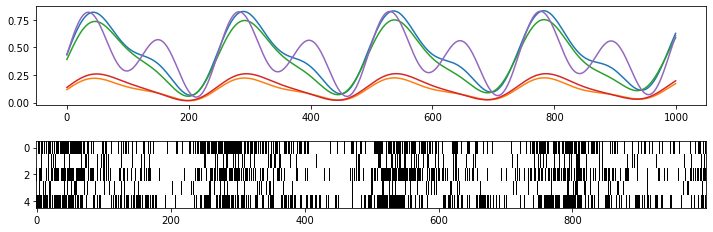

In [10]:
T = 1000
Dx = 5
Dz = 3
C = numpy.random.rand(Dx, Dz)
C /= numpy.sum(C, axis=1)[:,None]
freqs = .5 * numpy.random.rand(Dz) + .1
sines = .5 * (numpy.sin(numpy.arange(T)[:,None] * freqs[None] / 2 / numpy.pi) + 1)
rates = numpy.random.rand(Dx) * numpy.dot(sines, C.T)
X = numpy.array(numpy.random.rand(T, Dx) < rates, dtype=float)

pyplot.figure(figsize=(12,4))
pyplot.subplot(211)
pyplot.plot(rates)
pyplot.subplot(212)
pyplot.imshow(X.T, aspect=20, interpolation='nearest', cmap='gray_r')

In [ ]:
class FixedStateModel(state_models.LinearStateModel):
    
    def update_hyperparameters(self, smoothing_density: 'GaussianDensity', 
                               two_step_smoothing_density: 'GaussianDensity', **kwargs):
        pass
om = observation_models.BernoulliObservationModel(Dx, Dz)
sm = FixedStateModel(Dz, noise_z=1.)
ssm_em = StateSpaceEM(X, observation_model=om, state_model=sm)
ssm_em.run()

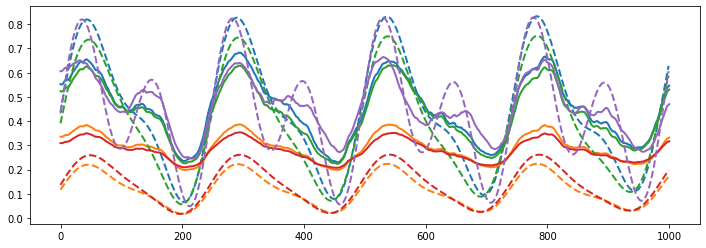

In [12]:
pyplot.figure(figsize=(12,4))
feature_vec = ssm_em.om.compute_expected_feature_vector(ssm_em.smoothing_density)
for idx in range(Dx):
    pyplot.plot(1/(1+numpy.exp(-numpy.dot(ssm_em.om.Theta[idx], feature_vec[:,0].T))).T, color='C%d' %idx, lw=2)
    pyplot.plot(rates[:,idx],'--', color='C%d' %idx, lw=2)
pyplot.show()

In [13]:
ssm_em.om.Theta

array([[-1.31612374,  0.15457938, -0.52256562],
       [-1.42059648,  0.22260778, -0.25458162],
       [-1.08375396,  0.38258772, -0.48694882],
       [-0.83597913,  0.61190638, -0.79006367],
       [-0.48797439,  0.94267477, -0.5017322 ]])

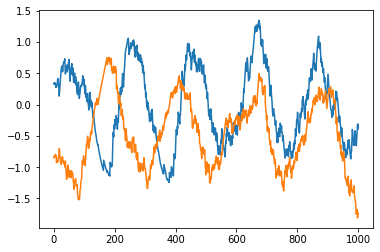

In [7]:
pyplot.plot(ssm_em.filter_density.mu)

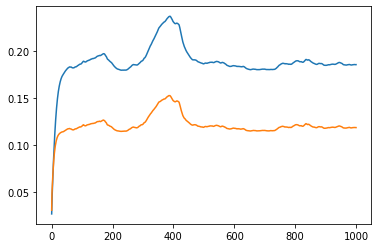

In [51]:
pyplot.plot(ssm_em.filter_density.Sigma.diagonal(axis1=1, axis2=2))

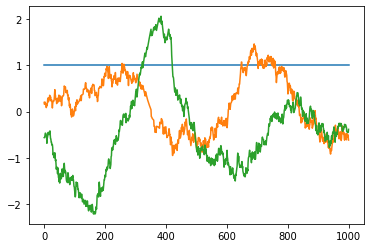

In [53]:
pyplot.plot(feature_vec[:,0])

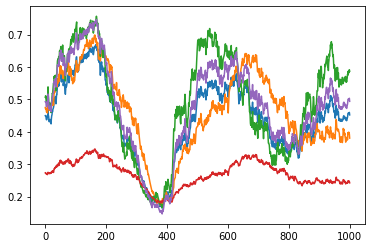

In [55]:
om.Theta

array([[-0.49300904, -0.13732854, -0.5678405 ],
       [-0.44677023,  0.36971113, -0.48683834],
       [-0.27021648, -0.55885164, -0.72562001],
       [-1.10724476,  0.15881598, -0.17286369],
       [-0.38413207, -0.15774505, -0.68957553]])

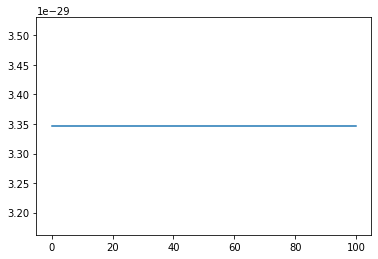

In [27]:
pyplot.plot(1/(1+numpy.exp(-numpy.dot(ssm_em.om.Theta[0,0], feature_vec[:,0,0].T))))

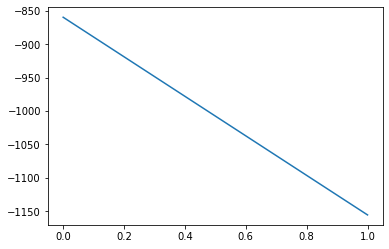

In [9]:
pyplot.plot(ssm_em.llk_list[1:])